In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
######  HW1，How do you handle duplicate values in a dataset in Python?

In [10]:
# if it is in a numpy array, there are two ways to remove redundancy

# method 1, use the "set" function and "list" function
a = np.array([1,2,2,3,4,5])
print a


a_dedupe = set(a)
b = list(a_dedupe)
print b

[1 2 2 3 4 5]
[1, 2, 3, 4, 5]


In [12]:
# method 2, use "unique" function
a = np.array([1,2,2,3,4,5])
print a

a_dedupe = np.unique(a)
print(a_dedupe)

[1 2 2 3 4 5]
[1 2 3 4 5]


In [29]:
# if it is  a dataframe, use "drop_duplicates"

b = pd.DataFrame([[1,2,3,4],[1,2,3,4],[2,3,4,4]],columns=["c1","c2","c3","c4"],index=
                ["r1","r2","r3"])
b_dedupe = b.drop_duplicates(keep="first")
print(b)

print(b_dedupe)

    c1  c2  c3  c4
r1   1   2   3   4
r2   1   2   3   4
r3   2   3   4   4
    c1  c2  c3  c4
r1   1   2   3   4
r3   2   3   4   4


In [0]:
s########## HW2, You are given two tables - friend_request and request_accepted. 
# Friend_request contains requester_id, time and sent_to_id and request_accepted table contains time, acceptor_id and requestor_id. 
# How will you determine the overall acceptance rate of requests? 

In [2]:
import pandas as pd
friend_request = pd.DataFrame({"requester_id":["r11","r12","r13"],"time":["t11","t12","t13"],
                               "sent_to_id":["s1","s2","s3"]})
request_accepted = pd.DataFrame({"requester_id":["r11","r12"],"time":["t11","t12"],
                               "acceptor_id":["s1","s2"]})
print(friend_request)
print(request_accepted)

  requester_id sent_to_id time
0          r11         s1  t11
1          r12         s2  t12
2          r13         s3  t13
  acceptor_id requester_id time
0          s1          r11  t11
1          s2          r12  t12


In [0]:
#sql
# SELECT friend_request.requester_id, request_accepted.requester_id
# FROM friend_request 
# LEFT JOIN request_accepted ON friend_request.requester_id = request_accepted.requester_id

# SELECT friend_request.sent_to_id, request_accepted.acceptor_id
# FROM friend_request 
# LEFT JOIN request_accepted ON friend_request.sent_to_id = request_accepted.acceptor_id

In [47]:
a = pd.merge(friend_request,request_accepted,how="left")
len(a["acceptor_id"][a.acceptor_id > 0])/(len(a["acceptor_id"])*1.0)

0.6666666666666666

In [50]:
############ HW3

print(“Issuer” of a credit card are companies like Visa, Mastercard, American Express. 
      Now we know the following rules:

CC number starts with: '4'
CC len : 16
Issuer: VISA

CC number starts with: '34', '37'
CC len : 15
Issuer : AMEX

CC number starts with: '36'
CC len : 14
Issuer : Diners Club

Credit card number starts with
'4026', '417500', '4405', '4508', '4844',
'4913', '4917'
CC len : 16
Issuer : VISAELECTRON

Now write Python scripts to identify the issuer of the following credit card numbers:

'4175004175004172' 
'4917491749174917'
'346416800707698'
'376416800707698'
'37641680070769832112'
'36641680070769'
'54545641680070769’ 
)

SyntaxError: ignored

In [0]:
# 思路 采用loop循环，避免逐个输入

cc_group = ["4175004175004172",
         "4917491749174917",
         "346416800707698",
         "376416800707698",
         "37641680070769832112",
         "36641680070769",
         "54545641680070769"]

In [61]:
# 定义函数
def filter(cc):
  if len(cc)==16 and cc[0]=="4":
    if cc[0:4]=="4026" or cc[0:4]=="4405" or cc[0:4]=="4508" or cc[0:4]=="4844" or cc[0:4]=="4913" or cc[0:4]=="4917" or cc[0:6]=="417500":
      return "VISAELECTRON"
    else:
      return "VISA"
  if (cc[0:2]=="34" or cc[0:2]=="37") and len(cc)==15:
    return "AMEX"
  if cc[0:2]=="36" and len(cc)==14:
    return "Diners Club"
  else:
    return "N/A"
  
for cc in cc_group:
  print(cc+" "+filter(cc))

4175004175004172 VISAELECTRON
4917491749174917 VISAELECTRON
346416800707698 AMEX
376416800707698 AMEX
37641680070769832112 N/A
36641680070769 Diners Club
54545641680070769 N/A


In [0]:
# HW4
# Similarly to PrintDailyTimeSeries() in the sample code,  
# write a Python function called PrintCumulativeTimeSeries(). Specifically:

#The function takes three inputs:
#experiment_id
#country
#vertical

#The function produces two outputs:
#A time series chart showing the cumulative uplift (hint: search for cumsum)
#Print out the cumulative % uplift on revenue, experiment vs. control. Hint: (red - blue) / blue %


In [87]:
import pandas as pd
my_data = pd.read_csv("https://raw.githubusercontent.com/mingchang0804/python_notebook/master/BA501_python_data.csv")

my_data.head(5)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,20170402,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,20170403,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,20170404,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,20170403,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,20170403,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [0]:
# 构造一个函数
def GetCumulativeSeries(my_data, experiment_id, country, vertical):
    table = my_data[["date", "spend_usd"]][(my_data.experiment_id == experiment_id) 
                                           & (my_data.country == country) & (my_data.vertical == vertical)]
    series = table.groupby('date')['spend_usd'].sum()
    my_data.date = pd.to_datetime(my_data.date, format="%Y%m%d")   
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    series = np.cumsum(series) # the key function is here
    return((series))

# 设置坐标系各个属性
import matplotlib.pyplot as plt
def PlotSeries(experiment_series, control_series):
    fig, ax = plt.subplots()
    ax.plot(experiment_series, color="red", label="experiment")
    ax.plot(control_series, color="blue", label="control")
    ax.set_title("Experiment vs. Control")
    ax.set_ylabel("Total spend")
    ax.set_ylim(0,160000)
    ax.legend()
    
# 终于可以打印出来    
def PrintCumulativeTimeSeries(my_data, experiment_id, country, vertical):
    experiment_series = GetCumulativeSeries(my_data, experiment_id[0], country, vertical)
    control_series = GetCumulativeSeries(my_data, experiment_id[1], country, vertical)
    
    print("Cumulative revenue impact: " + str(experiment_series[-1]/control_series[-1]*100-100) + "%")
    PlotSeries(experiment_series, control_series)

Cumulative revenue impact: -4.35272685442834%


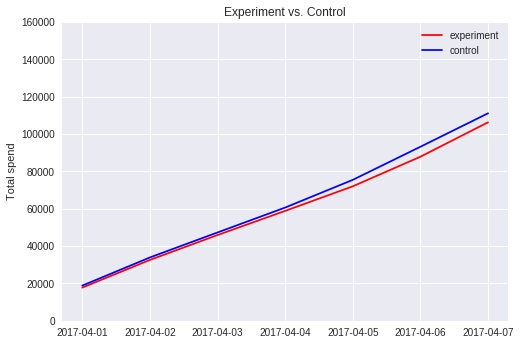

In [99]:
PrintCumulativeTimeSeries(my_data, [12624548,12624549], "US", "ANDROID_APPS")